# Physik in der Klimatologie - Beispiele 

In [1]:
%pip install -q ipywidgets
%pip install -q ipympl
%pip install -q pandas

In [1]:
from sandboxlib import *
%matplotlib ipympl
_ = plt.ioff()

In [2]:
print("Hallo Python.")

Hallo Python.


In [3]:
import warnings
warnings.filterwarnings("ignore")

## Das Plancksche Strahlungsgesetz, Boltzmann und Wien

Das Plancksche Strahlungsgesetz gibt für die Wärmestrahlung eines schwarzen Körpers die Verteilung der elektromagnetischen Strahlungsleistung an, und zwar als Funktion der Wellenlänge $\lambda$ (in m) bzw. der Frequenz $\nu$ (in s$^{-1}$) sowie der Oberflächentemperatur $T$ (in K).

Für unsere Darstellung nutzen wir die sogenannte Wellenlängendarstellung für die spektrale spezifische Ausstrahlung M$_{\lambda}^0$($\lambda$, T), siehe https://de.wikipedia.org/wiki/Plancksches_Strahlungsgesetz.

$M_{\lambda}^0(\lambda, T)\,dA\,d\lambda =  \frac{2\pi hc^2}{\lambda^5} \frac{1}{e^{hc/\lambda k T}-1} dA\,d\lambda$

- k = 1.380649e-23 (Boltzmann-Konstante, in J/K)
- h = 6.62607015e-34 (Planck-Konstante, in Js)
- c = 299792458  (Lichtgeschwindigkeit, in m/s)

Wenn wir nicht über eine Oberfläche A und das gesamte Wellenlängenspektrum $\lambda$ integrieren, können wir $dA\,d\lambda$ eliminieren. Die resultierende Einheit für $M_{\lambda}^0(\lambda, T)$ ist $\frac{W}{m^2 m}$. Wenn man wie üblich die spektrale Ausstrahlung in Abhängigkeit von $\lambda$  in der Einheit µm darstellen will, muss man das Ergebnis noch mit 10$^6$ multiplizieren.

Integrieren wir die über das gesamte Wellenlängensprektrum der Wärmestrahlung, erhalten wir das Stefan-Boltzmann-Gesetz, welches die Ausstrahlungsflussdichte eines Schwarzen Strahlers in Abhängigkeit von T beschreibt.

$M^0(T)\,dA = \sigma \cdot T^4\,dA$

- $\sigma$ = 5.670374419e-8 (Stefan-Boltzmann-Konstante, in W/m²/K⁴)

Die Wellenlänge $\lambda_{max}$ (in m), für welche $M_{\lambda}^0(\lambda, T)$ maximal wird, wird hingegen durch das Wiensche Verschiebungsgesetz beschrieben, welches sich ebenfalls aus dem Ausdruck für $M_{\lambda}^0(\lambda, T)$ herleiten lässt.

$\lambda_{max} = \frac{2897.8 \cdot 10^{-6}}{T}$



In [4]:
# Konstanten
k = 1.380649e-23 # J/K
h = 6.62607015e-34 # Js
c = 299792458 # m/s
sigma = 5.670374419e-8 # W/m²/K⁴
wienconst = 2897.8e-6 # m / K

In [5]:
# Funktionen
def planckl(lam, T):
    return (2*np.pi*h*c**2/lam**5) * (1 / ( np.exp(h*c/(lam*k*T)) - 1 ))
def lambdamax(T):
    return wienconst / T
def boltzmann(T):
    return sigma * T**4
def make_planck_labels(T):
    x1 = boltzmann(T)
    x2 = lambdamax(T)*1e6
    t = "T=%d K -> M$^0$(T)=%.1E W/m², $\lambda_{max}$=%.1f µm" % (T, x1, x2)
    return t

interactive(children=(IntSlider(value=100, description='T', layout=Layout(width='85%'), max=10000, min=10, ste…

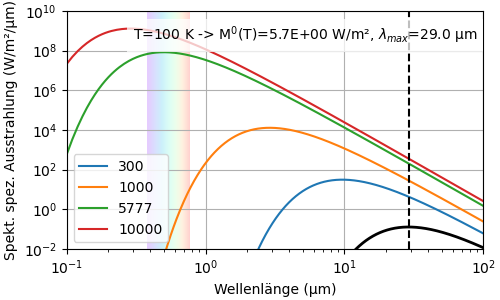

In [6]:
fig, ax = plt.subplots(1,1, num=" ", constrained_layout=True, figsize=(5,3))

grid = np.linspace(0, 1, 100).reshape((-1,100))
plt.imshow(grid, extent=(0.38, 0.78, 1e-2, 1e10), cmap=plt.cm.rainbow, alpha=0.2)

lam = np.arange(0.1,100,0.01)*1e-6
v = c/lam
for T in [300, 1000, 5777, 10000]:
    #plt.plot(lam*1e6, planck(v, T))
    plt.plot(lam*1e6, planckl(lam, T)*1e-6, label="%d" % T)
plt.legend(loc="lower left")
Tinit = 278
line, = plt.plot(lam*1e6, planckl(lam, Tinit)*1e-6, color="black", lw=2)
vline = plt.axvline(lambdamax(Tinit)*1e6, color="black", ls="--")
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(1e-2,1e10)
plt.xlim(0.1, 100)
plt.xlabel("Wellenlänge (µm)")
plt.ylabel("Spekt. spez. Ausstrahlung (W/m²/µm)")
plt.grid()
ax.set_aspect(2/14)

text = plt.text(0.3, 0.2e10, make_planck_labels(Tinit), 
                ha="left", va="top", color="black")
text.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='None'))

def update(T): 
    #line.set_ydata(sim.Q)
    #optional preventing autoscaling of y-axis 
    ax.autoscale(False)
    #create invisible dummy object to extract the vertices
    line.set_ydata(planckl(lam, T)*1e-6)
    vline.set_xdata([lambdamax(T)*1e6])
    text.set_text(make_planck_labels(T))
    fig.canvas.draw_idle()

Tw = widgets.IntSlider(value=100, min=10, max=10000, step=10,
                       layout=widgets.Layout(width='85%'))
w = widgets.interact(update, 
                     T=Tw)

plt.show()

# Feuchtemaße, Kondensation und Magnus-Formel

In [7]:
def magnus(T):
    """Return saturated vapor pressure (hPa) as a function of temperature T (deg C)
    """
    return 6.11*np.exp(17.5*T/(241.2+T))
def density_from_e_T(e, T):
    """Return vapor density (g/m3) from vapor pressure (hPa) and T (deg C) based on ideal gas law
    """
    T = 273.15 + T
    return 1000 * e * 100 / (461.52 * T)
def e_from_density_T(density, T):
    """Return vapor pressure (hPa) from vapor density (g/m3) and T (deg C) based on ideal gas law
    """
    T = 273.15 + T
    return density * (461.52 * T) / (1000 * 100) 
def density_from_T(T):
    vap = magnus(T)
    return density_from_e_T(vap,T)
def make_vapor_labels(point, kondensiert=0):
    T = point.get_xdata()[0]
    y = point.get_ydata()[0]
    E = magnus(T)
    e = e_from_density_T(y,T)
    RH = 100 * e/E
    t = "T=%.1f °C\na=%.1f g/m³\ne=%.1f hPa\nE=%.1f hPa\nRH=%.1f %%\nm(kondens.)=%.1f g" % (T, y, e, E, RH, kondensiert)
    #t = "T=%.1f °C\na=%.1f g/m³\ne=%.1f hPa\nE=%.1f hPa\nRH=%.1f %%" % (T, y, e, E, RH)
    return t

interactive(children=(FloatSlider(value=25.0, description='T', layout=Layout(width='85%'), max=40.0), Output()…

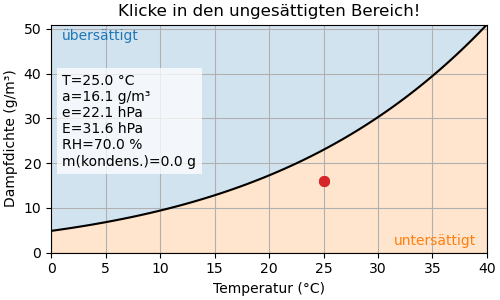

In [8]:
with plt.ioff():
    fig, ax = plt.subplots(1,1, num=" ", constrained_layout=True, figsize=(5,3))


T = np.linspace(0,40,100)
vapsat = magnus(T)
vapdens = density_from_T(T)
plt.plot(T, vapdens, "-", color="black")
#plt.plot(T, vapdens, "-", color="black")
plt.fill_between(T, vapdens, color="tab:orange", alpha=0.2)
plt.fill_between(T, y1=np.repeat(100,len(T)), y2=vapdens, color="tab:blue", alpha=0.2)
plt.xlabel("Temperatur (°C)")
plt.ylabel("Dampfdichte (g/m³)")
plt.text(39, max(vapdens)*0.05, "untersättigt", ha="right", va="center", color="tab:orange")
plt.text(1, max(vapdens)*0.95, "übersättigt", ha="left", va="center", color="tab:blue")
plt.title("Klicke in den ungesättigten Bereich!")
# #vline = plt.axvline(25, color="black", ls="--")
point, = plt.plot(25, 0.7*density_from_T(25), "o", 
                  color="tab:red", ms=7)
point2, = plt.plot(25, 0.7*density_from_T(25), "o", 
                  mfc="None", mec="tab:red", ms=7)


plt.xlim(min(T), max(T))
plt.ylim(0, max(vapdens))
plt.grid()

linx = []
liny = []
line, = plt.plot(linx,liny,"-", color="tab:green", lw=2)


text = plt.text(1, 40, 
                make_vapor_labels(point), 
                ha="left", va="top", color="black")
text.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='None'))

def update(T): 
    #line.set_ydata(sim.Q)
    #optional preventing autoscaling of y-axis 
    ax.autoscale(False)
    E = magnus(T)
    density = point.get_ydata()[0]
    satdensity = density_from_e_T(E,T)
    e = e_from_density_T(density, T)

    y = point.get_ydata()[0]
    if density >= satdensity:
        y = satdensity
        point.set_color("tab:blue")
    else:
        point.set_color("tab:red")
    point.set_xdata([T])
    point.set_ydata([y])
    linx.append(T)
    liny.append(y)
    line.set_xdata(linx)
    line.set_ydata(liny)
    mkond = liny[0]-liny[-1]
    text.set_text(make_vapor_labels(point, mkond))
    
    
    
    #point.set_ydata([density_from_T(T)])
    #vline.set_xdata([lambdamax(T)*1e6])
    #text.set_text(make_planck_labels(T))
    fig.canvas.draw_idle()

Tw = widgets.FloatSlider(value=25, min=0, max=40, step=0.1,
                       layout=widgets.Layout(width='85%'))
w = widgets.interact(update, 
                     T=Tw)


def onclick(event):
    global point, point2
    point.remove()
    point2.remove()
    point, = plt.plot(event.xdata, event.ydata, "o", 
                  color="tab:red", ms=7)
    point2, = plt.plot(event.xdata, event.ydata, "o", 
                  mfc="None", mec="tab:red", ms=7)
    global linx, liny, line
    linx = []
    liny = []
    line.remove()
    line, = plt.plot(linx,liny,"-", color="tab:green", lw=2)
    
    text.set_text(make_vapor_labels(point))
    Tw.value=event.xdata

_ = plt.ion()
cid = fig.canvas.mpl_connect('button_press_event', onclick)

fig.canvas.toolbar_visible = False
plt.show()
_ = plt.ioff()